In [1]:
%matplotlib inline



Welcome to the "Batch Normalization" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 

Pandas : Data loading, processing, transformation and manipulation.
pycombat : batch normalization



This small example illustrates how to use pyComBat in a default setting, and shows some results on ovarian cancer data, freely available on NCBI’s Gene Expression Omnibus, namely: 

GSE18520
GSE66957
GSE69428


In [1]:
# Author:  Mamun Rashid <m.rrashid.1@gmail.com>

# License: BSD 3 clause

!pip install combat
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from combat.pycombat import pycombat

from combat.pycombat import pycombat
import pandas as pd
import matplotlib.pyplot as plt


## Function to combined Gene Expression and Phenotype Data
def join_for_boxplot( merged_subset = None, phenotype = None ):
    merged_subset_t = merged_subset.transpose()
    merged_subset_t["Sample"] = merged_subset_t.index
    merged_df = phenotype_data.merge(merged_subset_t, left_on='Sample', right_on='Sample')
    merged_df_m = merged_df.melt( id_vars= ["Sample", "batch", "group"]  )
    merged_df_m_sub = merged_df_m.loc[ merged_df_m["value"] <= 20, ]
    return merged_df_m_sub



#### Phenotype Data 
Phenotype file contains information about sample batch, group (e.g. control, case )


Example : 

	Sample	batch	group
0	GSM461348	1	serous
1	GSM461349	1	serous
2	GSM461350	1	serous
3	GSM1634925	1	control
...
...
13	GSM1701038	2	control
14	GSM1701039	2	control
15	GSM1701040	2	control

In [84]:
phenotype_data = pd.read_csv("phenotype_file.csv")
phenotype_data

,Sample,batch,group
0,GSM461348,1,serous
1,GSM461349,1,serous
2,GSM461350,1,serous
3,GSM1634925,1,control
4,GSM1634926,1,control
5,GSM1634927,1,control
6,GSM1634928,1,control
7,GSM1634937,1,case
8,GSM1634938,1,case
9,GSM1634939,1,case


In [85]:
expression_data = pd.read_csv("merged_subset.csv", index_col=0)
expression_data.head()

,GSM461348,GSM461349,GSM461350,GSM1634925,GSM1634926,GSM1634927,GSM1634928,GSM1634937,GSM1634938,GSM1634939,GSM1701025,GSM1701026,GSM1701027,GSM1701038,GSM1701039,GSM1701040
Gene,,,,,,,,,,,,,,,,
C4orf33,10.9879,12.23380,6.20676,3.866505,5.052858,3.860439,3.610278,4.777216,5.235132,5.962090,1.80215,1.72736,1.78336,2.12476,1.98074,1.88793
RDH10,13.9704,12.56340,13.78910,4.823292,4.109368,4.476694,3.837235,5.823161,4.237443,5.664097,1.66524,1.67185,1.61167,2.30137,1.78833,1.52967
ANKAR,10.6009,12.20400,15.31990,4.002093,4.885364,4.096682,3.297262,4.908102,4.476362,5.032883,2.13337,1.94228,2.19849,2.13337,1.98565,2.44497
PTPRC,14.5597,9.79863,16.31520,4.714504,2.897484,3.161006,4.102070,2.962057,3.196703,3.412039,1.43761,1.57043,1.59059,1.76759,2.51191,1.71874
CPA6,14.4830,18.14020,13.73620,9.444860,9.962327,10.659870,10.021070,10.910250,10.297530,9.800626,1.76072,1.75257,2.11737,2.24458,1.84663,1.44758


#### Merge the expression and phenotype file for plotting. 
To the plot different batch or group in different color, we need to merge these two files.  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

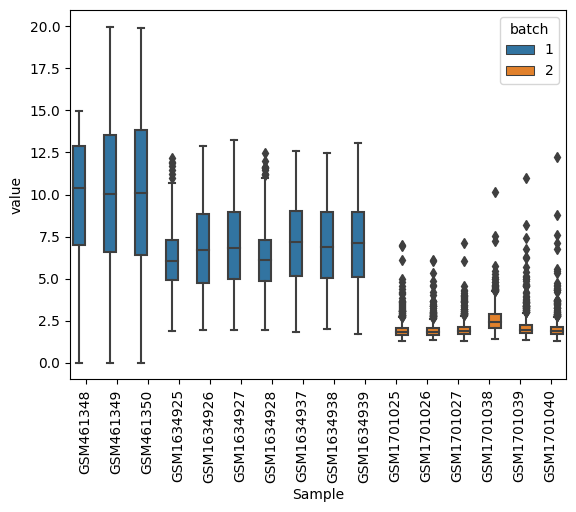

In [86]:
# Merge the expression and phenotype file for plotting. 
merged_df_m_sub = join_for_boxplot( expression_data, phenotype_data )

## Generate a plot
ax = sns.boxplot(data=merged_df_m_sub, x="Sample", y="value", hue="batch")
plt.setp(ax.get_xticklabels(), rotation=90)


#### Combat Batch Normalization
As you can see in the plot above, samples from two Batches have differnt profile (average expression profile very different between the groups).
1. Using combat we will try to normalize for batch to make them comparable for differential expression analysis. 
2. We will merge the expression file and the phenotype file for plotting.

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

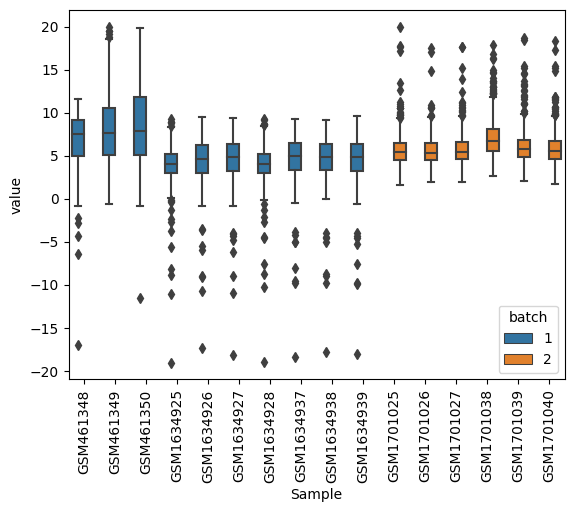

In [87]:
## We save the batch column from phenotype data frame in "batch" as a list.
batch = phenotype_data["batch"].to_list()

## We run pyComBat function, where give two parameters.
# 1. our original expression matrix :  expression_data
# 2. batch identification for each sample : batch

# 1. Using combat we will try to normalize for batch to make them comparable for differential expression analysis. 
df_corrected = pycombat(expression_data,batch)

## 2. Again for plotting we merge the batch correctred expression matrix with the phenotype data. 
df_corrected_merged = join_for_boxplot( df_corrected, phenotype_data )
ax = sns.boxplot(data=df_corrected_merged, x="Sample", y="value", hue="batch")
plt.setp(ax.get_xticklabels(), rotation=90)
